# Robot Learning Visualizations

#### Basic Setup

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

# Change some settings for better aesthetics
mpl.rcParams.update({
    "font.family": "serif",
    "mathtext.fontset": "cm",
    "axes.labelsize": 14,
    "axes.titlesize": 16,
    "legend.fontsize": 12,
    "xtick.labelsize": 12,
    "ytick.labelsize": 12,
    "lines.linewidth": 2,
})

# Enable high-definition inline plotting
%matplotlib inline
%config InlineBackend.figure_format = 'retina'  # or 'svg' for vector


# Optional: better style
sns.set(style="darkgrid")


#### Load Evaluation Log

In [112]:
df = pd.read_csv("eval_logs/eval_log.csv")
print("Data loaded:", df.shape)
df.head()


Data loaded: (500, 23)


,step,reward,x,y,z,x_angle,y_angle,z_angle,wheel_speed_l,wheel_speed_r,...,action_1,reward_survive,distance_penalty,y_angle_penalty,z_angle_penalty,wheel_l_penalty,wheel_r_penalty,y_angle_vel_penalty,x_vel_penalty,TimeLimit.truncated
0,0,18.413177,-0.000022,1.219634e-07,0.505116,-0.000055,3.983495,-0.000094,0.000000,0.000000,...,-1.255416,20.0,-4.973721e-08,-1.586823,-8.918146e-10,-0.000000,-0.000000,-0.000000,-0.000000,False
1,1,18.208302,-0.000003,1.994534e-07,0.504709,0.000412,3.920680,0.005270,0.460336,-0.542052,...,-1.254784,20.0,-1.056570e-09,-1.537173,-2.777027e-06,-0.105954,-0.146910,-0.001650,-0.000008,False
2,2,18.065838,0.000037,7.223062e-06,0.504188,-0.000083,3.825075,0.011844,0.618088,-0.735198,...,-1.172170,20.0,-1.333110e-07,-1.463120,-1.402905e-05,-0.191017,-0.270258,-0.009715,-0.000037,False
3,3,17.885145,0.000110,2.596252e-06,0.503776,0.001036,3.707620,0.025350,0.802820,-0.894457,...,-1.079460,20.0,-1.203592e-06,-1.374645,-6.426297e-05,-0.322260,-0.400027,-0.017781,-0.000077,False
4,4,17.645971,0.000215,7.266574e-07,0.503472,0.001975,3.573552,0.038204,0.978403,-1.071416,...,-1.012606,20.0,-4.627946e-06,-1.277027,-1.459584e-04,-0.478637,-0.573966,-0.024123,-0.000126,False


#### Reward per Step

Text(0.5, 0, 'Step')

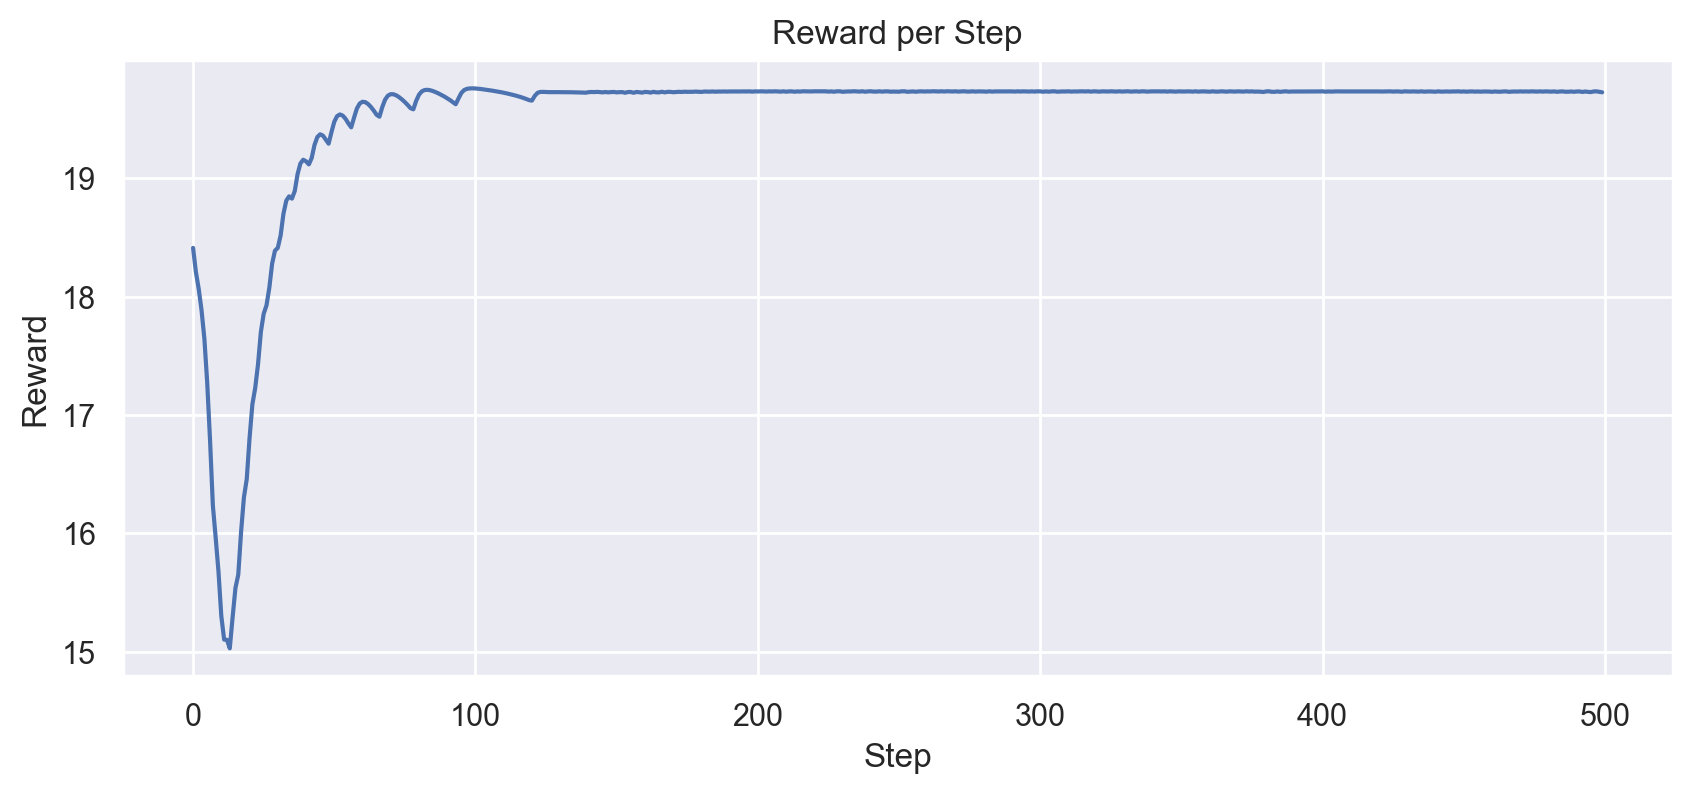

In [113]:
df.groupby("step")["reward"].sum().plot(title="Reward per Step", figsize=(10, 4))
plt.ylabel("Reward")
plt.xlabel("Step")


#### Physical Parameters over Tine (in one Plot)

In [114]:
# fig, ax = plt.subplots(figsize=(10, 5))
# df["x"].plot(label="x position", ax=ax)
# df["x_vel"].plot(label="x velocity", ax=ax)
# df["y_angle"].plot(label="y angle", ax=ax)
# plt.title("Selected Observations over Time")
# plt.xlabel("Step")
# plt.legend()


#### Physical Parameters over Tine (in seperate Plots)

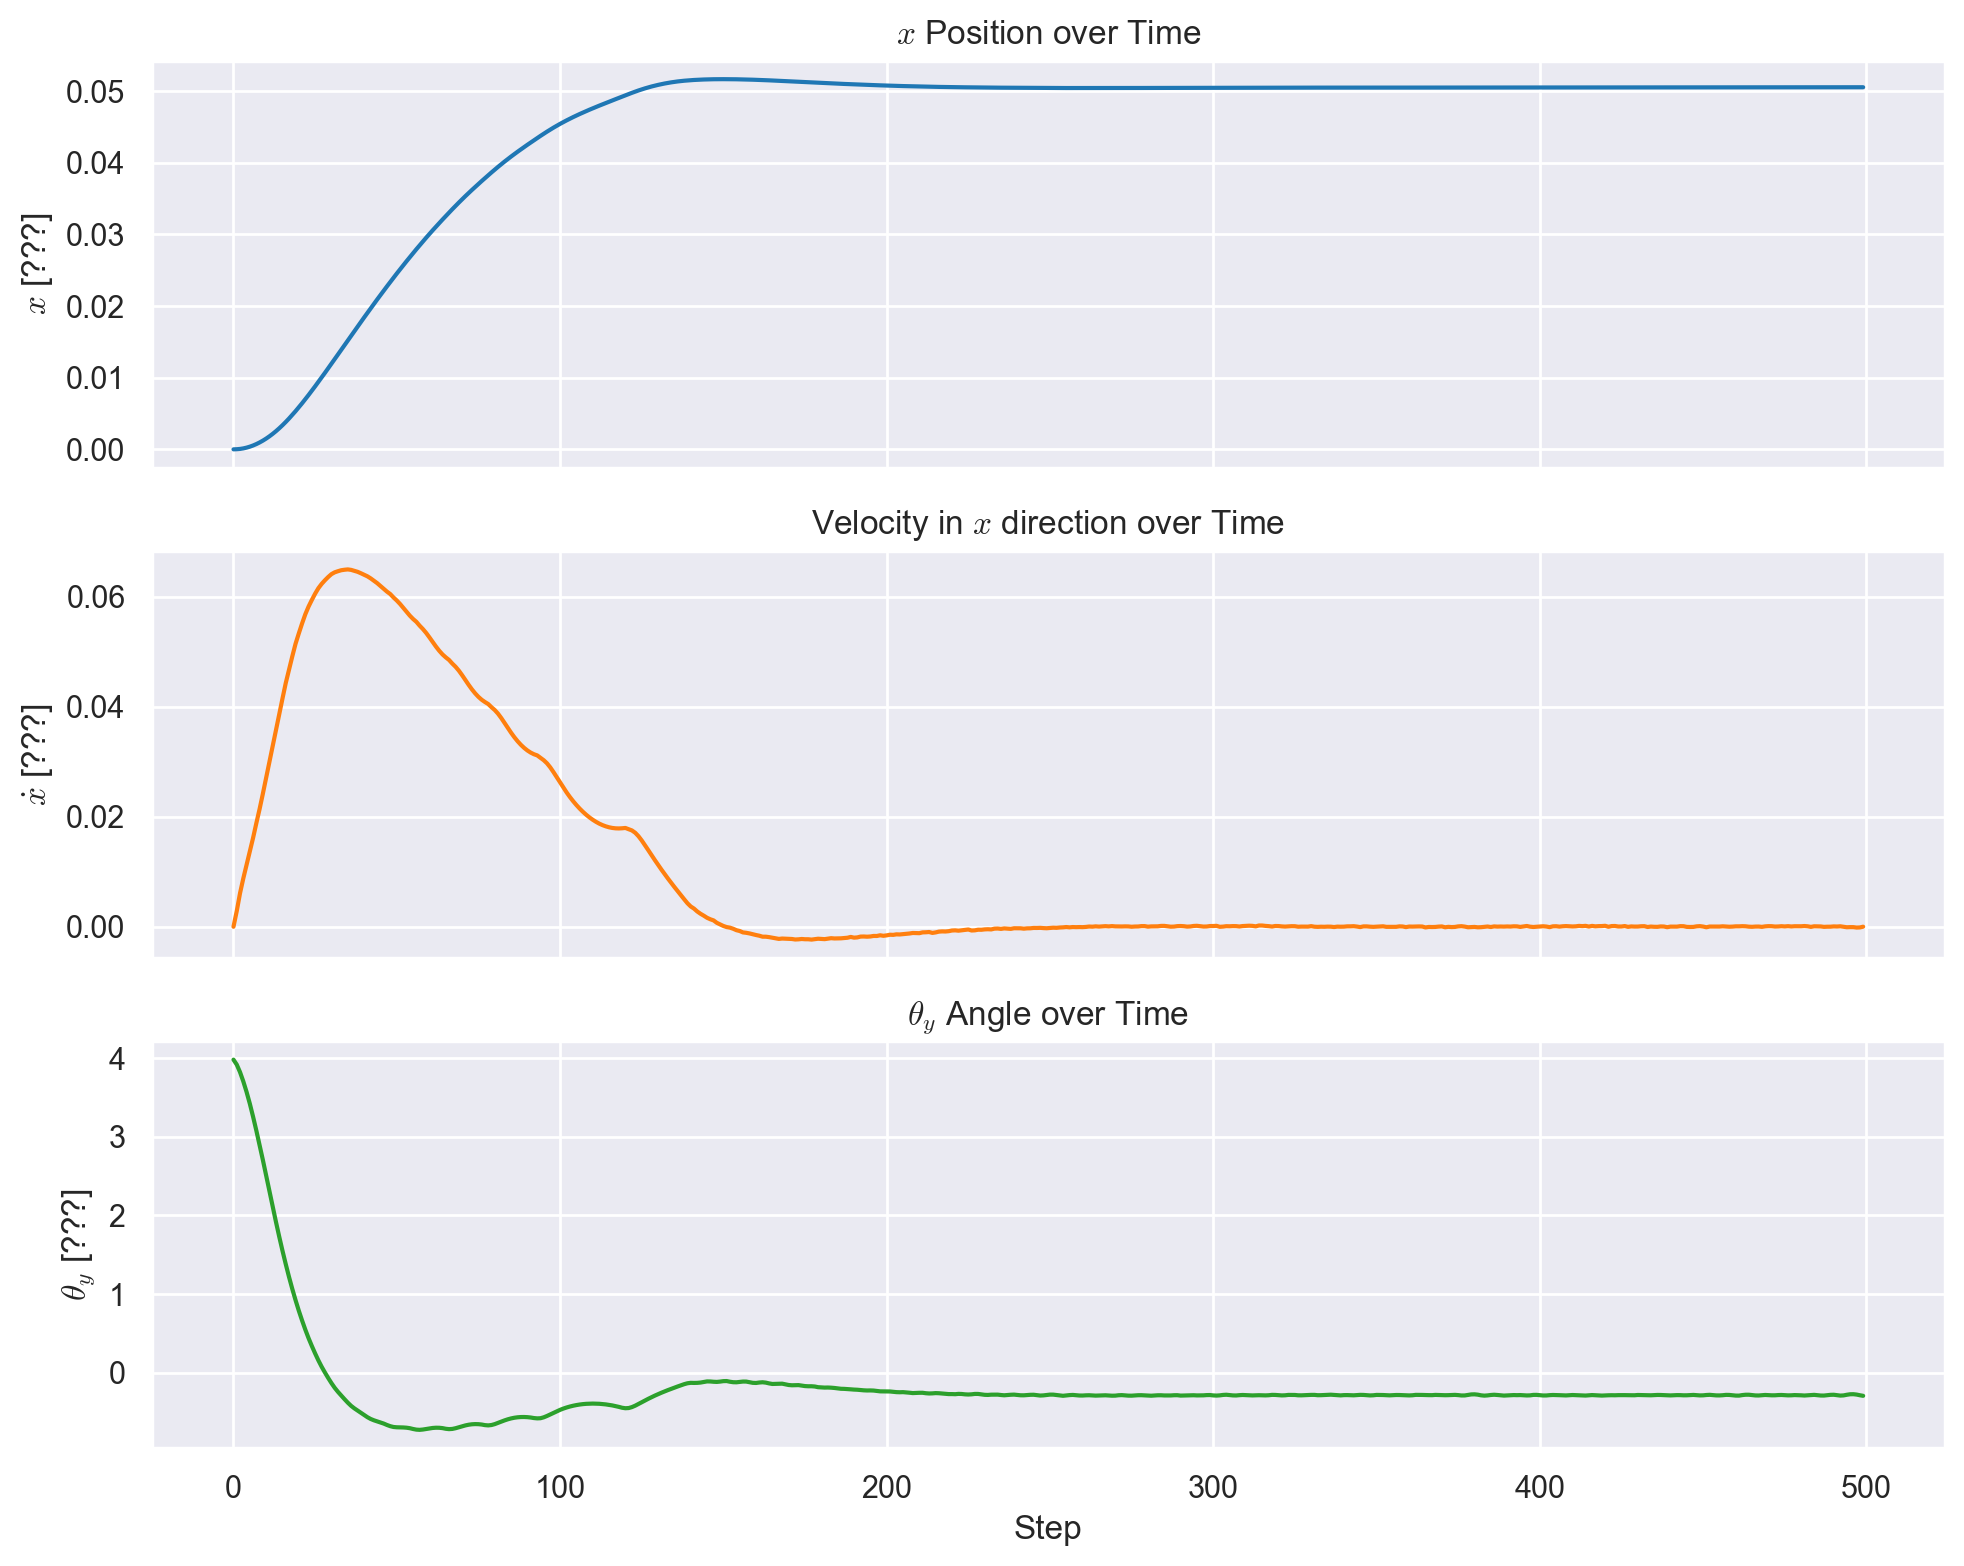

In [115]:
fig, axes = plt.subplots(3, 1, figsize=(10, 8), sharex=True)

df["x"].plot(ax=axes[0], label=r"x position", color="tab:blue")
axes[0].set_title(r"$x$ Position over Time")
axes[0].set_ylabel(r"$x$ [???]")
# axes[0].legend()

df["x_vel"].plot(ax=axes[1], label="x velocity", color="tab:orange")
axes[1].set_title(r"Velocity in $x$ direction over Time")
axes[1].set_ylabel(r"$\dot{x}$ [???]")
# axes[1].legend()

df["y_angle"].plot(ax=axes[2], label="y angle", color="tab:green")
axes[2].set_title(r"$\theta_y$ Angle over Time")
axes[2].set_ylabel(r"$\theta_y$ [???]")
axes[2].set_xlabel("Step")
# axes[2].legend()

plt.tight_layout()


array([<Axes: >, <Axes: >], dtype=object)

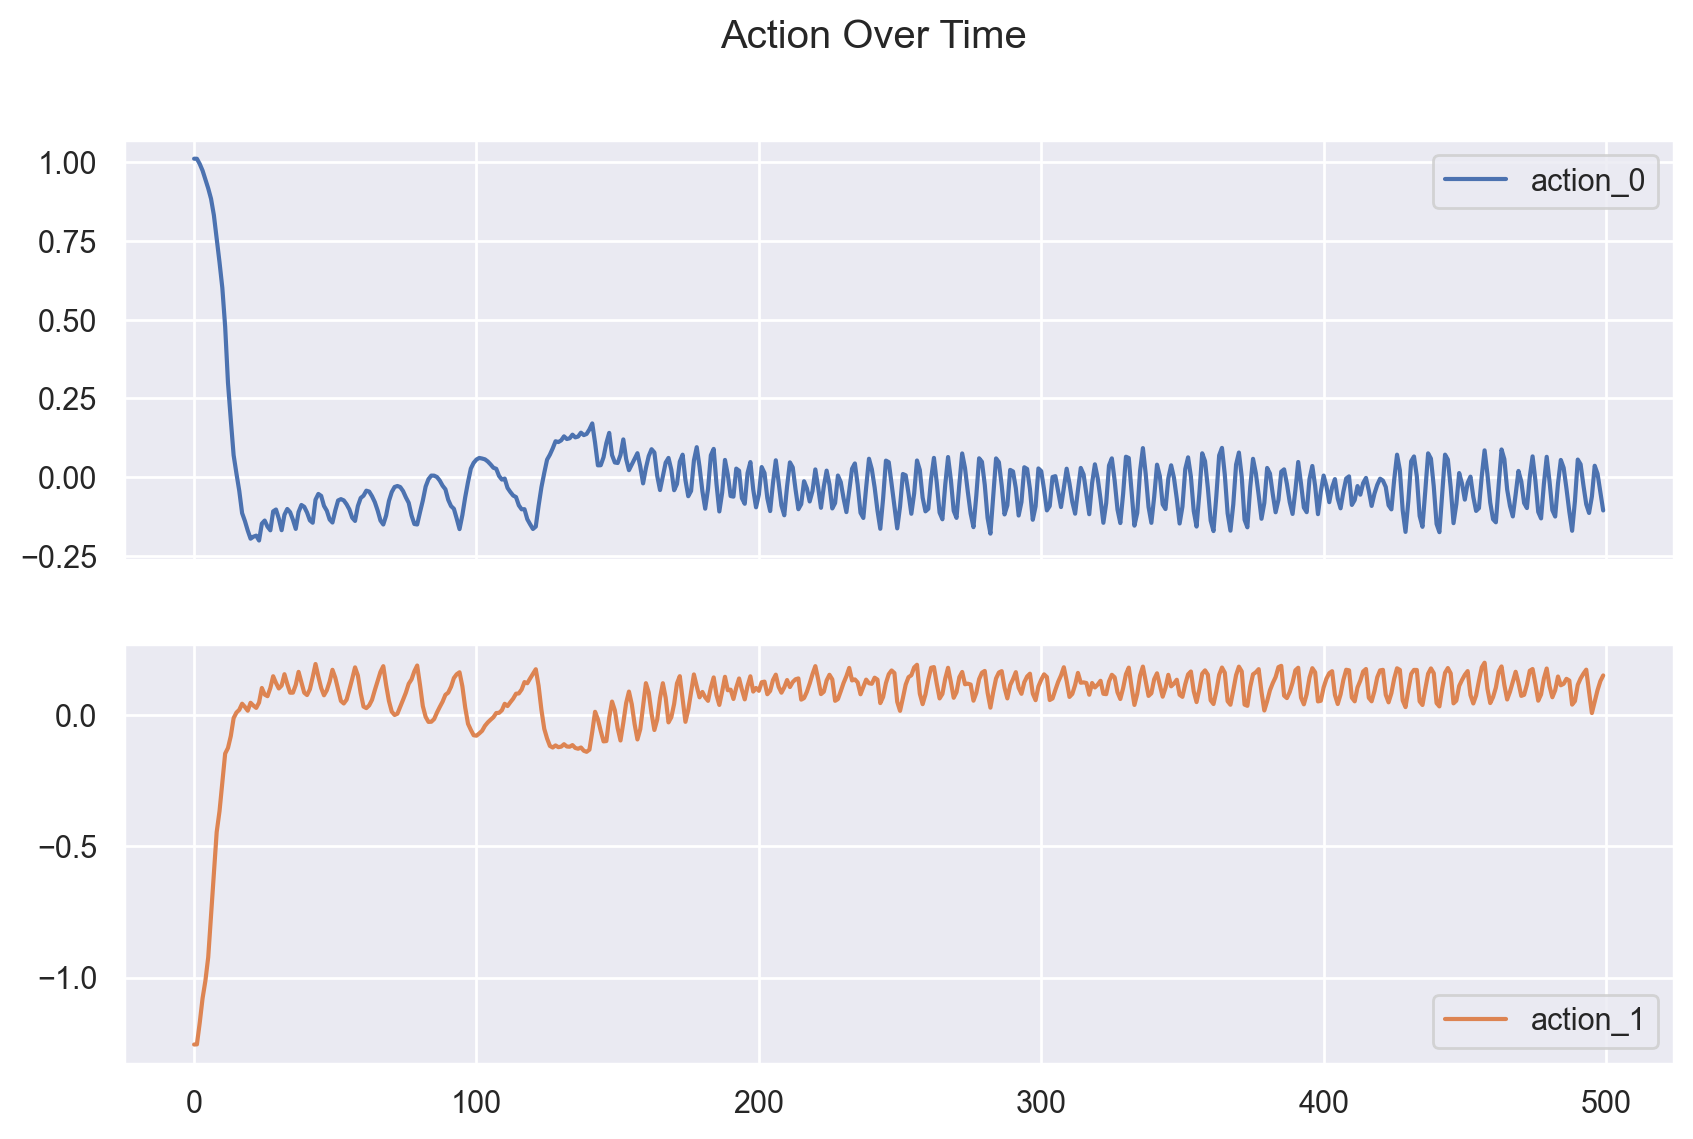

In [116]:
action_cols = [col for col in df.columns if "action" in col]
df[action_cols].plot(subplots=True, figsize=(10, 6), title="Action Over Time")


array([<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >], dtype=object)

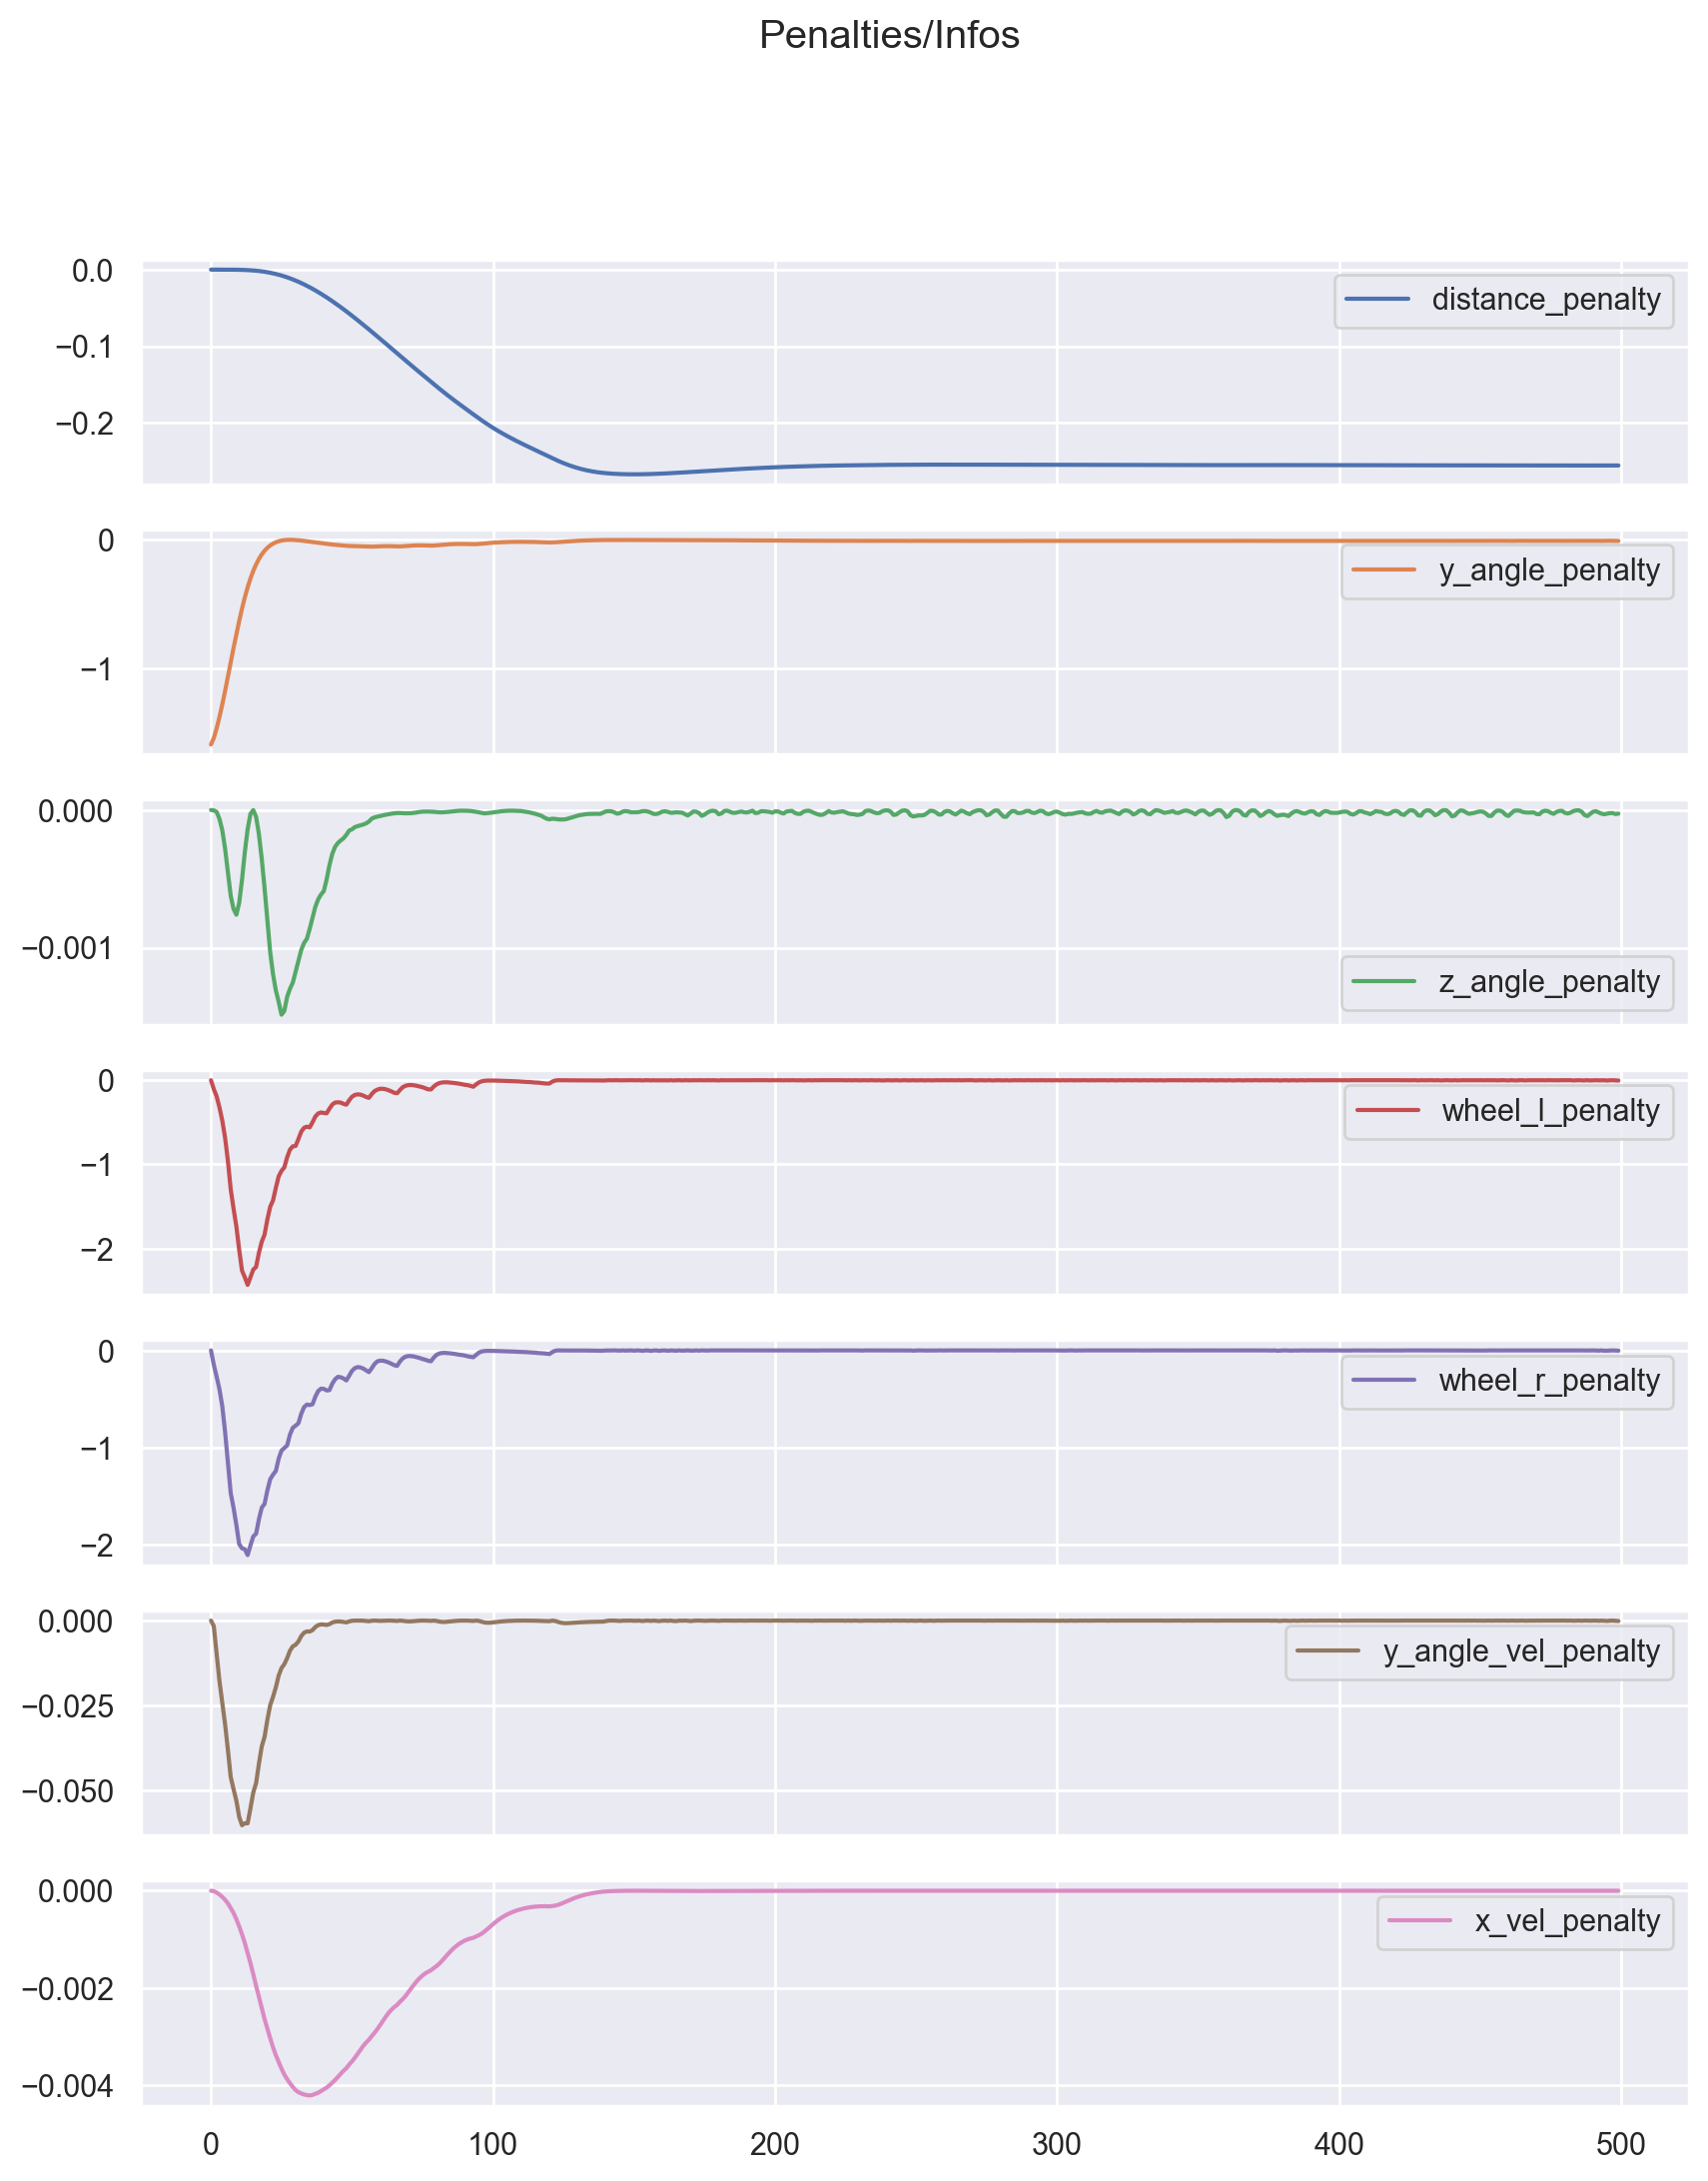

In [117]:
info_cols = [col for col in df.columns if "penalty" in col or "info_" in col]
df[info_cols].plot(subplots=True, figsize=(10, 12), title="Penalties/Infos")
